In [1]:
!python --version


Python 3.11.5


In [2]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 MB 14.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for numpy<2.3.0,>=2 from https://files.pythonhosted.org/packages/da/a8/4f83e2aa666a9fbf56d6118faaaf5f1974d456b1823fda0a176eff722839/numpy-2.2.6-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 14.3 MB/s eta 0:00:0000:0100:01
  Created wheel for opencv-python: filename=opencv_python-4.12.0.88-cp311-cp311-macosx_10_16_x86_64.whl size=27760633 sha256=642e33841ad65624d70b92497e9be08c8274adaa20fb8984d10dd01767da3d4b
  Stored in directory: /Users/lakshita/Library/Caches/pip/wheels/ce/e9/c1/c4465fd4bc6ac27114b191e8db49db31f4d4728d09e3f5011c
Successfully built openc

In [3]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/b7/3f/945ef7ab14dc4f9d7f40288d2df998d1837ee0888ec3659c813487572faa/pip-25.2-py3-none-any.whl.metadata
  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 17.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 26.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [4]:
img = cv2.imread('./images/dog.jpg') # img contains a numpy array of pixel values
print(type(img))
print(img.shape) # height, width, channels
print(img.dtype) # data type of pixel values

<class 'numpy.ndarray'>
(675, 1200, 3)
uint8


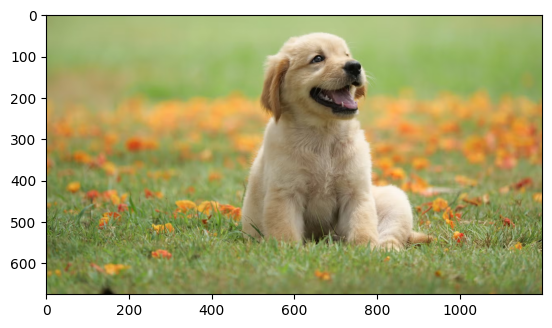

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # by default OpenCV uses BGR format
plt.imshow(img_rgb)

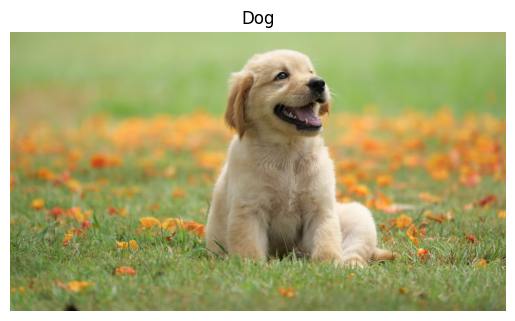

In [8]:
# created a simple function to display images
def show_image(title= "", image = None):
    plt.title(title)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

show_image("Dog", img)

### Changing Color Spaces
Resource: https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html

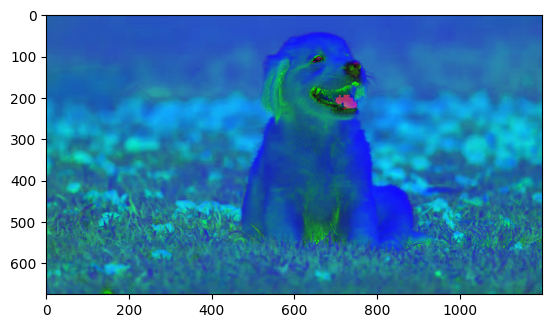

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))

##### Object Tracking
In HSV, it is easier to represent a color than in BGR color-space, therefore we convert the frame to HSV to extract an object

In [7]:
# find hsv range of red color
bgr_red = np.uint8([[[0,0,255]]])
hsv_red = cv2.cvtColor(bgr_red, cv2.COLOR_BGR2HSV)
print(hsv_red) # [[[  0 255 255]]]

[[[  0 255 255]]]


In [6]:
# lower and upper range of red color in hsv
lower_red = np.array([0,100,100])
upper_red = np.array([10,255,255])

In [ ]:
cap = cv2.VideoCapture(0)
while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Threshold the HSV image to get only red colors
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break


In [ ]:
cv2.destroyAllWindows()

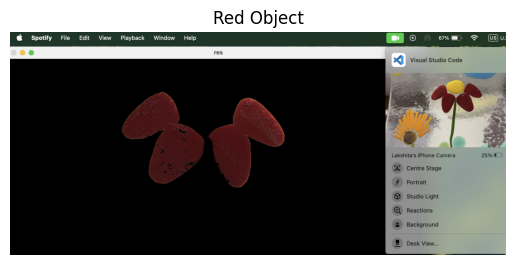

In [9]:
obj = cv2.imread('./images/object-tracking-red.png')
show_image("Red Object", obj)

To simultaneously track multiple colors, use bitwise OR to combine masks


##### Splitting Color Channels

Split separates a multi-channel image into its individual channels. Merge combines several single-channel images into a multi-channel image

In [11]:
B, G, R = cv2.split(img)
print(B.shape, G.shape, R.shape) # each channel is 2D array

(675, 1200) (675, 1200) (675, 1200)


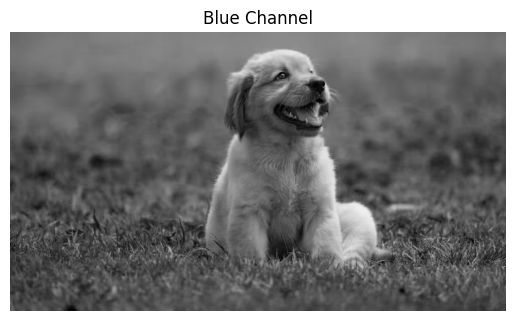

In [18]:
show_image("Blue Channel", B) # lacks other channels so it is a grayscale image

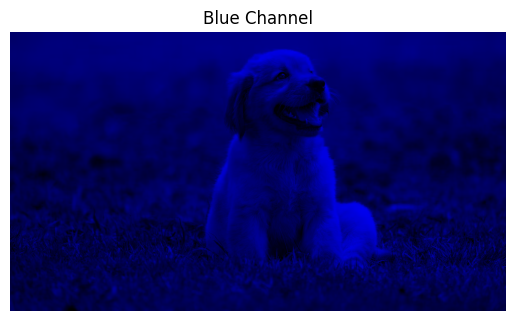

In [19]:
zeros = np.zeros(img.shape[:2], dtype = "uint8") # uint8 is 0-255
show_image("Blue Channel", cv2.merge([B, zeros, zeros])) # merge 3 channels

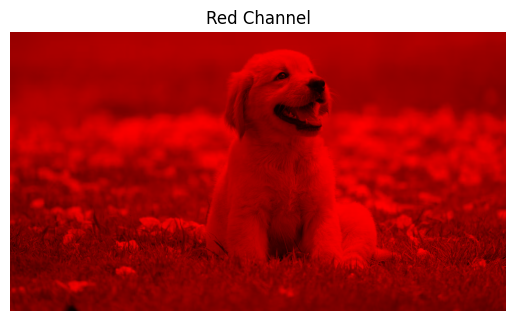

In [20]:
show_image("Red Channel", cv2.merge([zeros, zeros, R]))

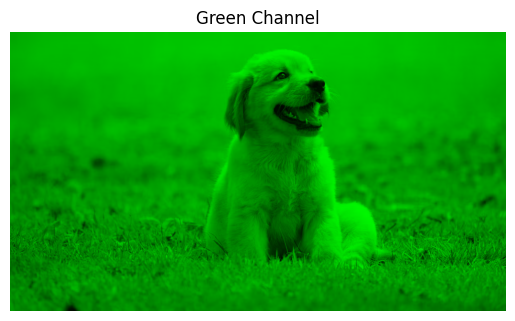

In [21]:
show_image("Green Channel", cv2.merge([zeros, G, zeros]))

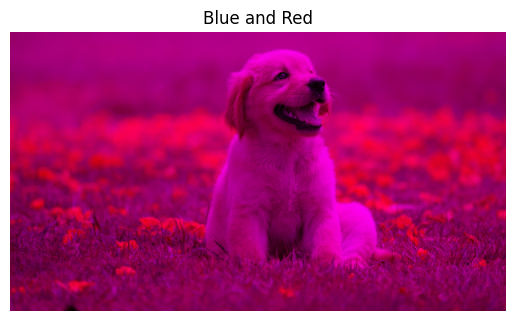

In [26]:
show_image("Blue and Red", cv2.merge([B, zeros, R]))

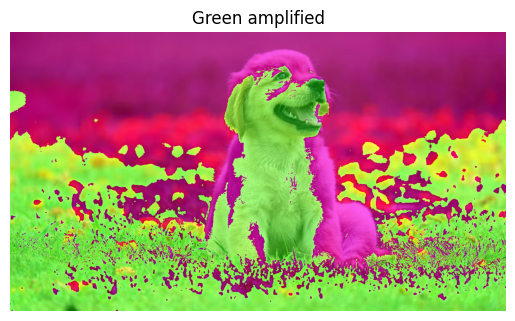

In [40]:
show_image("Green amplified", cv2.merge([B, G+100, R]))